<h3 STYLE="background: #c2edff;padding: 0.5em;">Step 5. 線形回帰</h3>

<ol>
<li><a href="#1">「ワインの品質」データ読み込み</a>
<li><a href="#2">単回帰分析</a>
<li><a href="#3">重回帰分析</a>
<li><a href="#4">練習</a>
</ol>

In [20]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="1">1. 「ワインの品質」データ読み込み</a></h3>

データは <a href="http://archive.ics.uci.edu/ml/index.php" target="_blank">UC Irvine Machine Learning Repository</a> から取得したものを少し改変しました。

* 赤ワイン https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt

* 白ワイン https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt

<h4 style="border-bottom: solid 1px black;">　<a href="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names">詳細</a></h4>

<ol>
<li>fixed acidity : 不揮発酸濃度（ほぼ酒石酸濃度）
<li>volatile acidity : 揮発酸濃度（ほぼ酢酸濃度）
<li>citric acid : クエン酸濃度
<li>residual sugar : 残存糖濃度
<li>chlorides : 塩化物濃度
<li>free sulfur dioxide : 遊離亜硫酸濃度
<li>total sulfur dioxide : 亜硫酸濃度
<li>density : 密度
<li>pH : pH
<li>sulphates : 硫酸塩濃度
<li>alcohol : アルコール度数
<li>quality (score between 0 and 10) : 0-10 の値で示される品質のスコア
</ol>

In [3]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'winequality-red.csv') # Python 2 の場合
urllib.request.urlretrieve(url, 'winequality-red.txt') # Python 3 の場合

('winequality-red.txt', <http.client.HTTPMessage at 0x106629dd8>)

In [4]:
# データの読み込み
df1 = pd.read_csv('winequality-red.txt', sep='\t', index_col=0) 

In [10]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="2">2. 単回帰分析</a></h3>

まずは、1 つの説明変数を用いて単回帰分析を行います。

In [15]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
X = df1.loc[:, ['pH']].as_matrix() # 説明変数 = pH
Y = df1['fixed acidity'].as_matrix() # 目的変数 = fixed acidity
clf.fit(X, Y) # 予測モデルを作成

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# 回帰係数
clf.coef_

array([-7.70229968])

In [17]:
# 切片
clf.intercept_

33.822823396397531

以上の結果より、次の回帰式が求められたことがわかります。

In [ ]:
[fixed acidity] = -7.70229968 × [pH] + 33.822823396397531

決定係数は、寄与率とも呼ばれ、説明変数が目的変数）のどれくらいを説明できるかを表す値であり、１に近いほど分析の精度が高いことを表します。

In [14]:
# 決定係数
clf.score(X, Y)

0.46645921425609038

結果を 2 次元座標上にプロットすると、以下のようになります。青線が回帰直線を表します。

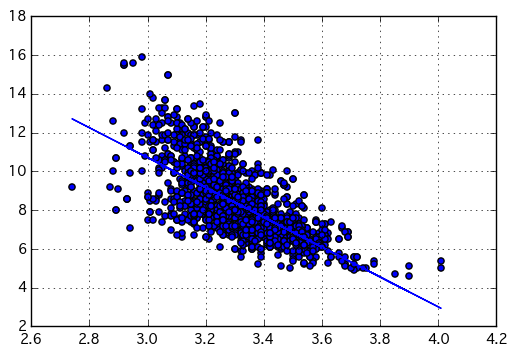

In [54]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))

plt.grid()
plt.show()

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="3">3. 重回帰</a></h3>

続いて、「quality」を目的変数に、「quality」以外を説明変数として、重回帰分析を行います。

In [18]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
df1_except_quality = df1.drop("quality", axis=1)
X = df1_except_quality.as_matrix()
 
# 目的変数に "quality (品質スコア)" を利用
Y = df1['quality'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, Y)
  
# 切片 (誤差)
print(clf.intercept_)

# 偏回帰係数
pd.DataFrame({"Name":df1_except_quality.columns, "Coefficients":clf.coef_}).sort('Coefficients', ascending=False) 

21.9652084494


,Coefficients,Name
9,0.916334,sulphates
10,0.276198,alcohol
0,0.024991,fixed acidity
3,0.016331,residual sugar
5,0.004361,free sulfur dioxide
6,-0.003265,total sulfur dioxide
2,-0.182564,citric acid
8,-0.413653,pH
1,-1.083590,volatile acidity
4,-1.874225,chlorides


上記の結果からワインの品質スコアは、以下のような回帰式で表せることがわかります。

In [ ]:
[quality] = 21.9652084495 + 0.916334 × [sulphates] + 0.276198 × [alcohol] +
            0.024991 × [fixed acidity] + 0.016331 × [residual sugar] +
            0.004361 × [free sulfur dioxide] + (-0.003265) × [total sulfur dioxide] +
            (-0.182564) × [citric acid] + (-0.413653) × [pH] + 
            (-1.083590) × [volatile acidity] + (-1.874225) × [chlorides] +
            (-17.881164) × [density] + 

ただし決定係数は次の値です。

In [19]:
clf.score(X, Y)

0.36055170303868822

各変数がどの程度目的変数に影響しているかを確認するには、各変数を正規化 (標準化) し、平均 = 0, 標準偏差 = 1 になるように変換した上で、重回帰分析を行うと偏回帰係数の大小で比較することができるようになります。

In [56]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
df1s = df1.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
df1s_except_quality = df1s.drop("quality", axis=1)
X = df1s_except_quality.as_matrix()
 
# 目的変数に "quality (品質スコア)" を利用
Y = df1s['quality'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
pd.DataFrame({"Name":df1s_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort('Coefficients', ascending=False) 


,Coefficients,Name
10,0.359057,alcohol
1,0.316408,volatile acidity
9,0.306056,sulphates
4,0.224532,chlorides
6,0.184775,total sulfur dioxide
8,0.105068,pH
5,0.061931,free sulfur dioxide
0,0.056479,fixed acidity
7,0.048708,density
3,0.047687,residual sugar


正規化した偏回帰係数を確認すると、alcohol (アルコール度数) が最も高い値を示し、品質に大きな影響を与えていることがわかります。

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;"><a name="4">練習5.1</a></h4>

白ワインのデータ(https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt) を読み込み、単回帰分析、重回帰分析を行なってください。

In [ ]:
# 練習5.1